In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [6]:
df = pd.read_csv("Telco_churn.csv")

In [19]:
df.info()
df.head(5)
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int64
Dependents                                 7043 non-null int64
tenure                                     7043 non-null int64
PhoneService                               7043 non-null int64
PaperlessBilling                           7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null float64
Churn                                      7043 non-null int64
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
Interne

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

In [20]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


In [8]:
#Imputing missing data with 0
df.TotalCharges.fillna(0, inplace = True) 

In [9]:
for item in df.columns:
    print(item)
    print(df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [10]:
#Convert predictor value to a binary value
convert_columns = ['Churn', 
                  'Partner',
                  'Dependents',
                  'PhoneService',
                  'PaperlessBilling']
for item in convert_columns:
    df[item].replace(to_replace = "Yes", value = 1, inplace = True)
    df[item].replace(to_replace = "No", value = 0, inplace = True)

In [11]:
#Removing CustomerID
df = df.iloc[:, 1:]

In [12]:
df = pd.get_dummies(df)

### Fitting a model
In this section, I will practice fitting a model to predict customer churn, including tuning some parameters.

In [13]:
#Random Forest Data Prep
labels = np.array(df['Churn'])
features = df.drop('Churn', axis = 1)
features_name = list(features.columns)
features = np.array(features)

In [14]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 37)

In [15]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5282, 41)
Training Labels Shape: (5282,)
Testing Features Shape: (1761, 41)
Testing Labels Shape: (1761,)


In [16]:
#Training random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels);

In [17]:
prediction_rf = rf.predict(test_features)

In [18]:
#Confusion Matrix for default random forest

from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, prediction_rf))
print('Accuracy Rate:', (1129 + 258) / (1129 + 238 + 136 + 258))

[[1129  136]
 [ 238  258]]
Accuracy Rate: 0.7876206700738216


In [15]:
#Cross-validation Evaluation 
from sklearn.model_selection import cross_val_score, GridSearchCV
clf_score = cross_val_score(rf, features, labels, cv = 10)
print(clf_score)
clf_score.mean()

[0.79716312 0.81134752 0.79716312 0.79574468 0.77840909 0.75710227
 0.82244318 0.79971591 0.79971591 0.80512091]


0.7963925713736744

A 10-fold cross validation returns an accuracy rate of 80% from my default random forest model. 

### Tuning Parameter with GridSearch

In [16]:
#Take a look at our currently used parameters
from pprint import pprint 
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


According to the documentation of random forest in sk-learn, the most important hyperparameters are **n_estimators**,
the number of trees in the forest, and **max_features**, the maximum number considered for splitting a node. To experiment, I will play with these hyperparameters.

In [17]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100, 1000, num = 20)]
max_features = ['auto', 'sqrt']

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features}
pprint(random_grid)

{'max_features': ['auto', 'sqrt'],
 'n_estimators': [100,
                  147,
                  194,
                  242,
                  289,
                  336,
                  384,
                  431,
                  478,
                  526,
                  573,
                  621,
                  668,
                  715,
                  763,
                  810,
                  857,
                  905,
                  952,
                  1000]}


In [19]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, random_state = 42)
rf_random.fit(features, labels)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'n_estimators': [100, 147, 194, 242, 289, 336, 384, 431, 478, 526, 573, 621, 668, 715, 763, 810, 857, 905, 952, 1000], 'max_features': ['auto', 'sqrt']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [20]:
rf_random.best_params_

{'max_features': 'auto', 'n_estimators': 1000}

In [22]:
best_random = rf_random.best_estimator_
clf_score_random = cross_val_score(best_random, features, labels, cv = 10)
print(clf_score_random)
clf_score_random.mean() #Has not improved in 10-fold CV after all the computation! 

[0.7929078  0.8212766  0.80283688 0.79007092 0.77414773 0.74573864
 0.8125     0.79261364 0.80113636 0.80227596]


0.7935504522388621

In [23]:
pprint(best_random.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [37]:
#Feature Importance
importance = list(best_random.feature_importances_)

In [39]:
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(features_name, importance)]
feature_importance = sorted(feature_importance, key = lambda x:x[1], reverse = True)

In [41]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

Variable: TotalCharges         Importance: 0.17
Variable: tenure               Importance: 0.15
Variable: MonthlyCharges       Importance: 0.15
Variable: Contract_Month-to-month Importance: 0.06
Variable: PaperlessBilling     Importance: 0.03
Variable: InternetService_Fiber optic Importance: 0.03
Variable: OnlineSecurity_No    Importance: 0.03
Variable: TechSupport_No       Importance: 0.03
Variable: PaymentMethod_Electronic check Importance: 0.03
Variable: SeniorCitizen        Importance: 0.02
Variable: Partner              Importance: 0.02
Variable: Dependents           Importance: 0.02
Variable: gender_Female        Importance: 0.02
Variable: gender_Male          Importance: 0.02
Variable: OnlineBackup_No      Importance: 0.02
Variable: Contract_Two year    Importance: 0.02
Variable: MultipleLines_No     Importance: 0.01
Variable: MultipleLines_Yes    Importance: 0.01
Variable: InternetService_DSL  Importance: 0.01
Variable: OnlineSecurity_Yes   Importance: 0.01
Variable: OnlineBack

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### Gradient Boosting 

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(learning_rate = 0.1)
gbmodel.fit(train_features, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

[0.01234213 0.00206298 0.00990515 0.11023124 0.00037322 0.02964997
 0.21138698 0.32778612 0.01302209 0.00824157 0.01791984 0.00172497
 0.00208754 0.00136508 0.01792778 0.         0.02445155 0.
 0.         0.0139467  0.         0.00230509 0.00132656 0.
 0.00320143 0.03271765 0.         0.00856421 0.00136609 0.
 0.00867851 0.         0.         0.00787121 0.06917366 0.00366355
 0.01216164 0.00360192 0.00841616 0.02609753 0.00642991]


<Container object of 41 artists>

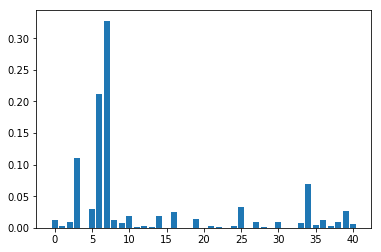

In [32]:
print(gbmodel.feature_importances_)
pyplot.bar(range(len(gbmodel.feature_importances_)), gbmodel.feature_importances_)

In [75]:
feature_importance_gb = pd.DataFrame({'variable': features_name, 
                                      'importance': gbmodel.feature_importances_})
feature_importance_gb = feature_importance_gb[['variable', 'importance']]
feature_importance_gb = feature_importance_gb.sort_values('importance', ascending = False).reset_index()
feature_importance_gb.drop(columns = 'index', inplace = True)
feature_importance_gb

,variable,importance
0,TotalCharges,0.327786
1,MonthlyCharges,0.211387
2,tenure,0.110231
3,Contract_Month-to-month,0.069174
4,TechSupport_No,0.032718
5,PaperlessBilling,0.029650
6,PaymentMethod_Electronic check,0.026098
7,OnlineSecurity_No,0.024452
8,InternetService_Fiber optic,0.017928
9,MultipleLines_No,0.017920
